In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# 9) Hyperbolic PDEs

Solve the linear advection equation by evolving an initial waveform in a periodic grid.

Use the different methods seen in the lecture:
- Loser method
- LAX
- Upwind
- LAX-Wendroff

See how the waveform behaves after passing through the grid multiple times and compare the results you get with the different methods and different values for c.


In [2]:
def lax(rho, c):
    rhonew = 0.5 * (np.roll(rho, -1) + np.roll(rho, 1)) - 0.5 * c * (np.roll(rho, -1) - np.roll(rho, 1))
    return(rhonew)

In [3]:
def upwind(rho, c):
    rhonew = rho - c * (rho - np.roll(rho, 1)) # for u > 0
    # rhonew = rho - c * (np.roll(rho, -1) - rho) # for u < 0
    return(rhonew)

In [4]:
def laxwend(rho, c):
    rhonew = 0.5 * c * (1+c) * np.roll(rho, 1) + (1-c**2) * rho - 0.5 * c * (1-c) * np.roll(rho, -1)
    return(rhonew)

In [5]:
def evolve(rho, method, ax, c, tend):
    colors = plt.cm.viridis.reversed()(np.linspace(0,1,tend))
    # colors = plt.cm.viridis(np.linspace(0,1,tend))
    for i in range(tend):
        rho = method(rho, c)
        if i % 100 == 0:
            ax.plot(rho,label = i, color=colors[i])

In [6]:
def make_plots(rho, c, tend):
    fig, ax = plt.subplots(3,1, figsize =(9,9))
    ax[0].set_title("LAX method")
    ax[1].set_title("Upwind method")
    ax[2].set_title("LAX-Wendroff method")
    fig.suptitle(f'c = {c}')
    evolve(rho, lax, ax[0], c, tend)
    evolve(rho, upwind, ax[1], c, tend)
    evolve(rho, laxwend, ax[2], c, tend)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    fig.savefig(f"hyperbolic_pde_c_{c}.pdf", bbox_inches = 'tight')

In [7]:
N = 500

rho = np.zeros(N)
rho[int(N/5):int(2*N/5)] = 1

tend = 5000

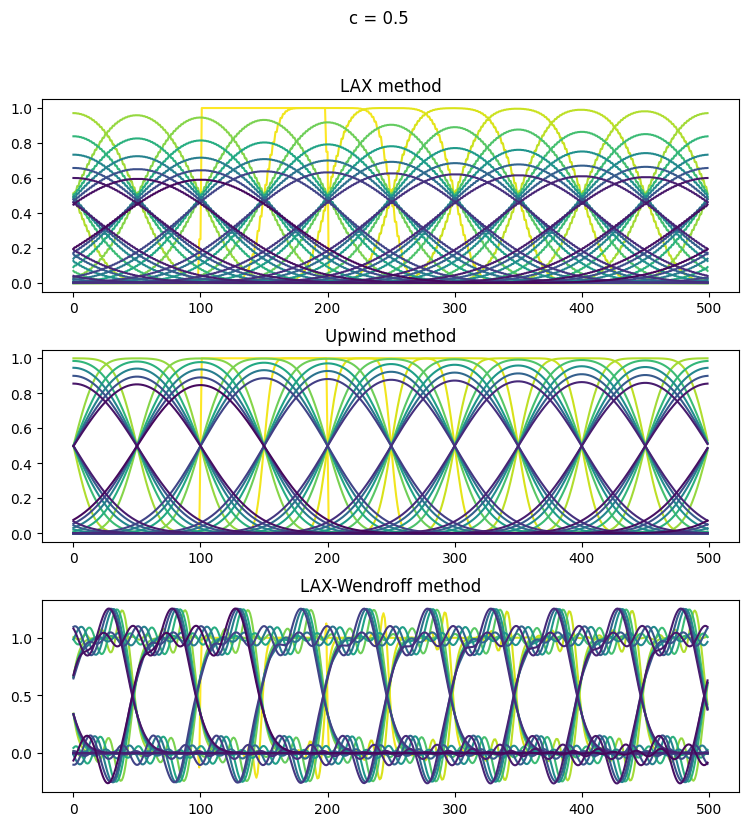

In [8]:
c = 0.5

make_plots(rho, c, tend)

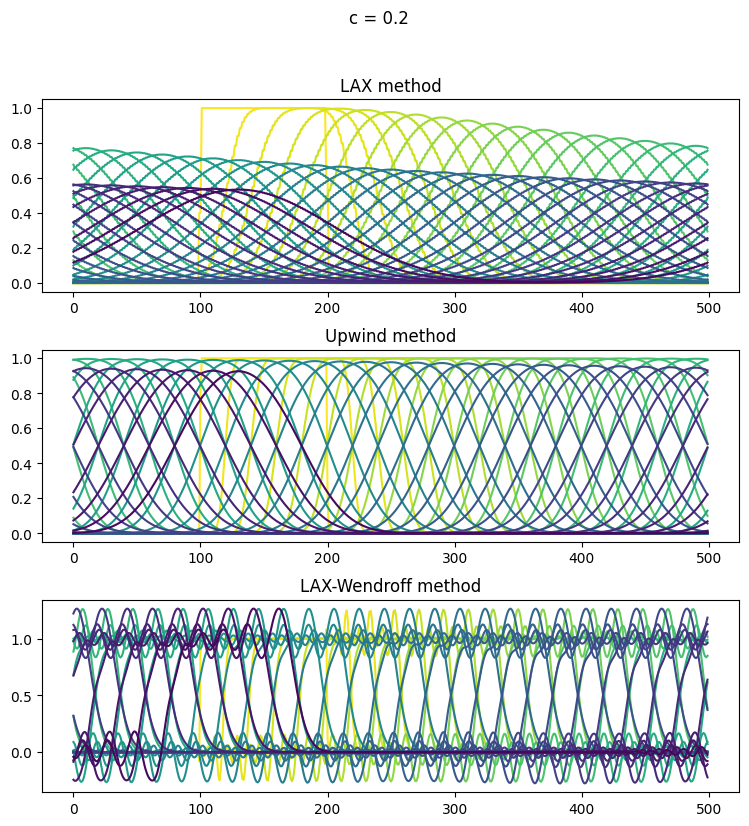

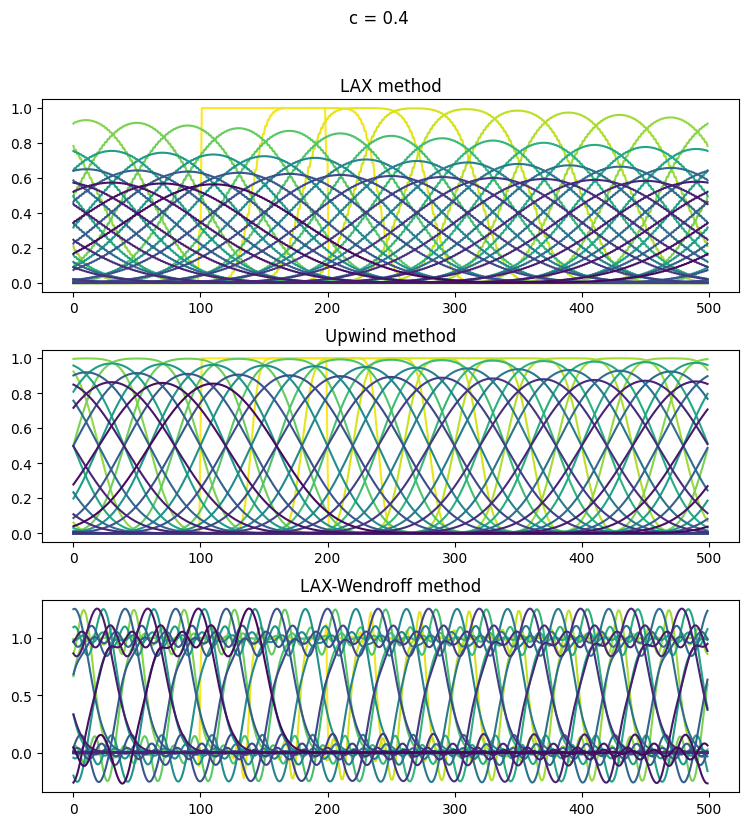

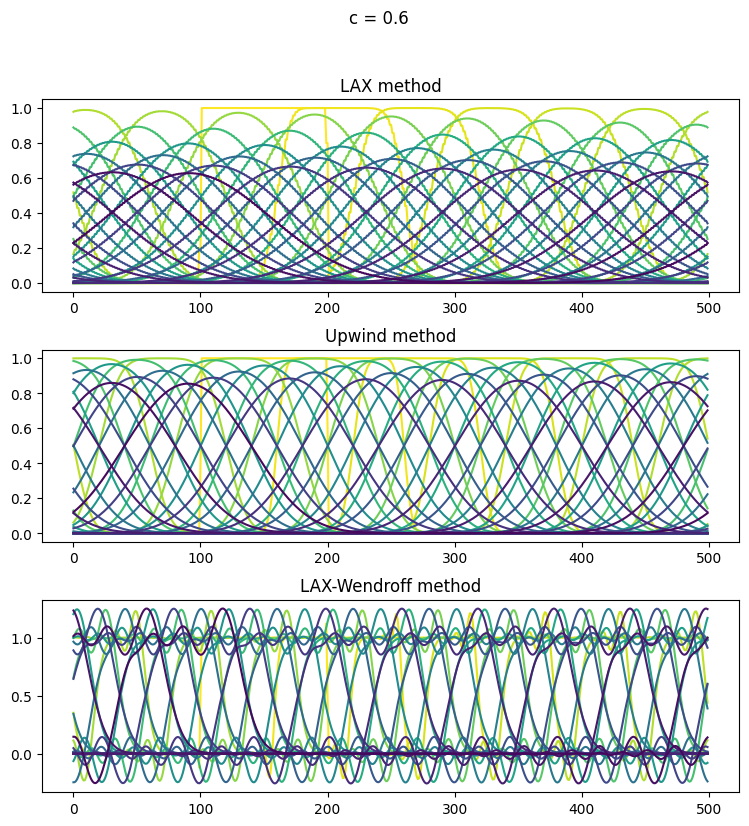

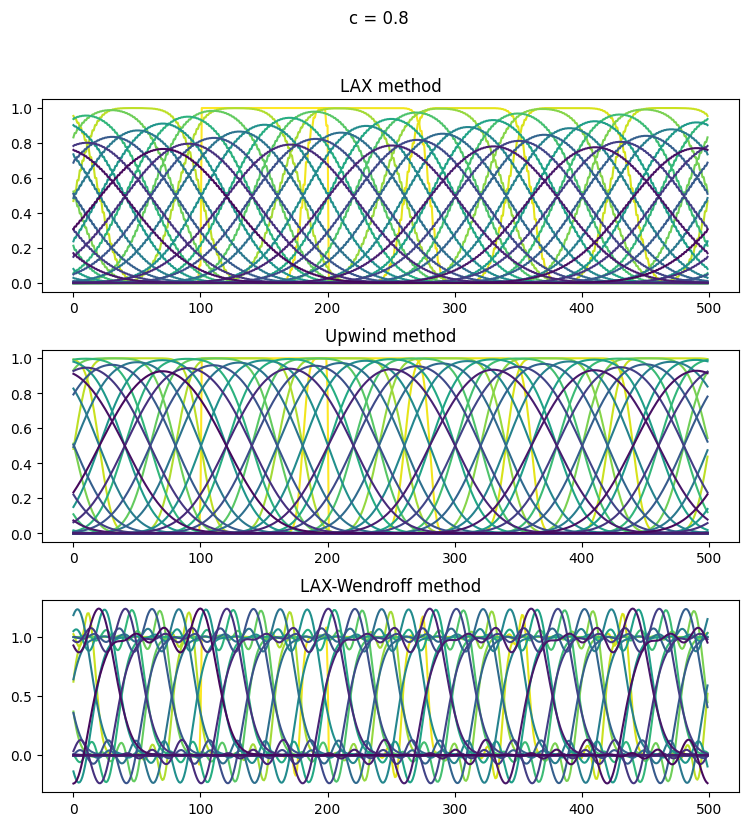

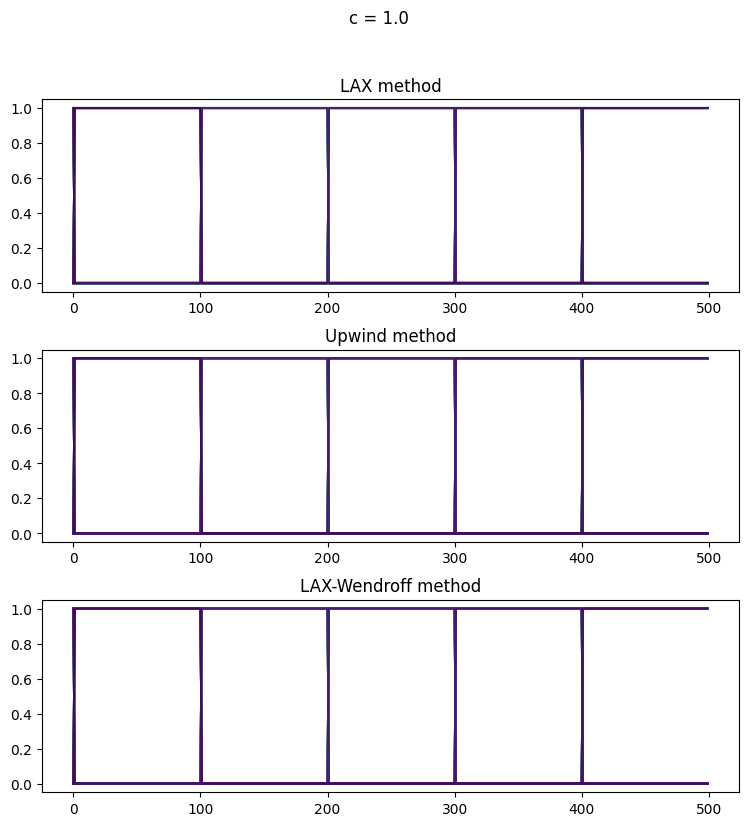

In [9]:
cs = np.round(np.arange(0, 1, 0.2) + 0.2, 1)

for c in cs:
    make_plots(rho, c, tend)